In [20]:
#준비
import pandas as pd
import numpy as np
from plotnine import *
import folium
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [21]:
#raw data
wifi = pd.read_csv('wifi data.csv', encoding='cp949')
wifi.head()

설치장소명      설치장소상세 설치시도명 설치시군구명 설치시설구분 서비스제공사명          와이파이SSID  \
0       청송군청         민원실  경상북도    청송군    관공서      KT  Public WiFi Free   
1  청송군농업기술센터  1층, 2층, 3층  경상북도    청송군    관공서      KT  Public WiFi Free   
2     청송읍사무소         민원실  경상북도    청송군    관공서      KT  Public WiFi Free   
3     부동면사무소         민원실  경상북도    청송군    관공서      KT  Public WiFi Free   
4     부남면사무소         민원실  경상북도    청송군    관공서      KT  Public WiFi Free   

      설치년월                         소재지도로명주소                 소재지지번주소  \
0  2014-12     경상북도 청송군 청송읍 군청로 51(월막리 330)    경상북도 청송군 청송읍 월막리 330   
1  2015-10   경상북도 청송군 청송읍 주왕산로 177(송생리 720)    경상북도 청송군 청송읍 송생리 720   
2  2014-12  경상북도 청송군 청송읍 중앙로 253(월막리 239-2)  경상북도 청송군 청송읍 월막리 239-2   
3  2013-09   경상북도 청송군 부동면 이전앞길 1(이전리 829-5)  경상북도 청송군 부동면 이전리 829-5   
4  2015-10  경상북도 청송군 부남면 대전로 119(대전리 638-2)  경상북도 청송군 부남면 대전리 638-2   

       관리기관명      관리기관전화번호         위도          경도     데이터기준일자   제공기관코드  \
0  경상북도 청송군청  054-870-6073  36.436041  129.039831  2018-08-01  5160000   
1  경상북도 청송군청  054-870-6073  36.391757  129.064260  2018-08-01  5160000   
2  경상북도 청송군청  054-870-6073  36.434252  129.039132  2018-08-01  5160000   
3  경상북도 청송군청  054-870-6073  36.356876  129.141711  2018-08-01  5160000   
4  경상북도 청송군청  054-870-6073  36.344456  129.045771  2018-08-01  5160000   

      제공기관명  Unnamed: 17  
0  경상북도 청송군          NaN  
1  경상북도 청송군          NaN  
2  경상북도 청송군          NaN  
3  경상북도 청송군          NaN  
4  경상북도 청송군          NaN

In [22]:
#한글 깨짐 방지
font_path = 'C:/Windows/Fonts/KopubDotumLight.ttf'
fontprop = fm.FontProperties(fname=font_path).get_name()
mpl.font_manager._rebuild()
plt.rc('font', family=fontprop)

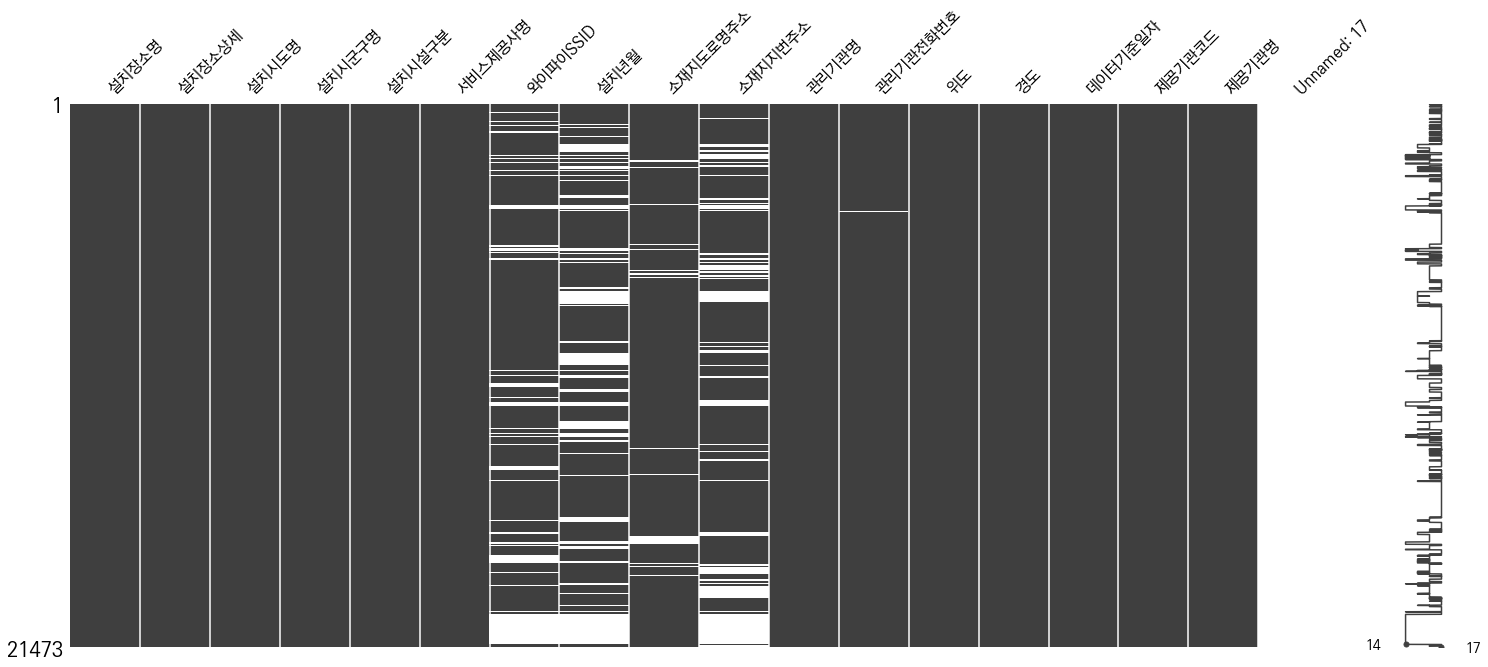

In [23]:
#결측치 확인
msno.matrix(wifi)

In [24]:
wifi.dtypes

설치장소명           object
설치장소상세          object
설치시도명           object
설치시군구명          object
설치시설구분          object
서비스제공사명         object
와이파이SSID        object
설치년월            object
소재지도로명주소        object
소재지지번주소         object
관리기관명           object
관리기관전화번호        object
위도             float64
경도             float64
데이터기준일자         object
제공기관코드          object
제공기관명           object
Unnamed: 17    float64
dtype: object

In [25]:
wifi.shape

(21473, 18)

In [26]:
seoul = wifi[wifi['설치시도명'].str.contains('서울')]
seoul.shape

(4163, 18)

In [27]:
seoul.head()

설치장소명                                           설치장소상세  설치시도명 설치시군구명  \
267  금천구청  금천구청 B1 평생학습관(1), 전산교육장(1), U통합센터(1), 영유아프라자(1)  서울특별시    금천구   
268  금천구청            금천구청 1F 로비(2), 통합민원실(1),보건소차량기사대기실(1)  서울특별시    금천구   
269  금천구청                       금천구청 2F 건축과(1), 보건소 민원실(1)  서울특별시    금천구   
270  금천구청                  금천구청 3F 구의회 복도(1), 보건소 임상병리실(1)  서울특별시    금천구   
271  금천구청              금천구청 4F 구의회 복도(1), 보건소 국민체력 증진센터(1)  서울특별시    금천구   

    설치시설구분 서비스제공사명              와이파이SSID     설치년월  \
267    관공서    금천구청  PublicWiFi@Geumcheon  2013-04   
268    관공서    금천구청  PublicWiFi@Geumcheon  2013-04   
269    관공서    금천구청  PublicWiFi@Geumcheon  2013-04   
270    관공서    금천구청  PublicWiFi@Geumcheon  2013-04   
271    관공서    금천구청  PublicWiFi@Geumcheon  2013-04   

                        소재지도로명주소             소재지지번주소       관리기관명  \
267  서울특별시 금천구 시흥대로73길 70, (시흥동)  서울특별시 금천구 시흥동 1020  서울특별시 금천구청   
268  서울특별시 금천구 시흥대로73길 70, (시흥동)  서울특별시 금천구 시흥동 1020  서울특별시 금천구청   
269  서울특별시 금천구 시흥대로73길 70, (시흥동)  서울특별시 금천구 시흥동 1020  서울특별시 금천구청   
270  서울특별시 금천구 시흥대로73길 70, (시흥동)  서울특별시 금천구 시흥동 1020  서울특별시 금천구청   
271  서울특별시 금천구 시흥대로73길 70, (시흥동)  서울특별시 금천구 시흥동 1020  서울특별시 금천구청   

         관리기관전화번호         위도          경도     데이터기준일자   제공기관코드      제공기관명  \
267  02-2627-1122  37.457076  126.896037  2018-08-10  3170000  서울특별시 금천구   
268  02-2627-1122  37.457076  126.896037  2018-08-10  3170000  서울특별시 금천구   
269  02-2627-1122  37.457076  126.896037  2018-08-10  3170000  서울특별시 금천구   
270  02-2627-1122  37.457076  126.896037  2018-08-10  3170000  서울특별시 금천구   
271  02-2627-1122  37.457076  126.896037  2018-08-10  3170000  서울특별시 금천구   

     Unnamed: 17  
267          NaN  
268          NaN  
269          NaN  
270          NaN  
271          NaN

In [28]:
seoul['설치시설구분'].value_counts()

관공서        1441
기타         1103
지역문화시설      567
편의시설        497
서민·복지시설     281
관광          135
교육시설         92
교통시설         47
Name: 설치시설구분, dtype: int64

In [29]:
#시각화
%matplotlib inline

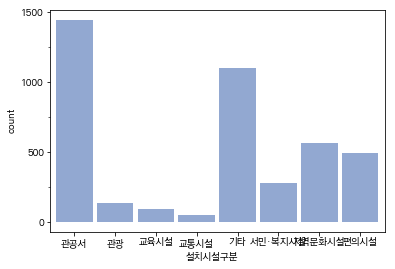

<ggplot: (88213137556)>

In [30]:
(ggplot(seoul) + aes('설치시설구분') + geom_bar(fill='#92A8D1') + theme(element_text(family='fontprop')))

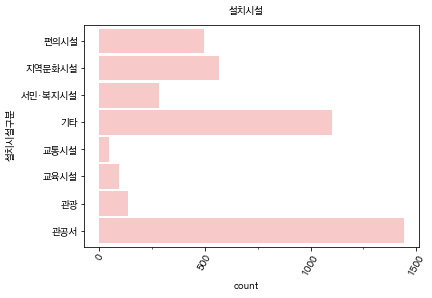

<ggplot: (-9223371948641644470)>

In [31]:
(ggplot(seoul) + aes('설치시설구분') + ggtitle('설치시설') + geom_bar(fill='#F7CAC9') 
 + coord_flip() + theme(element_text(family='fontprop'), axis_text_x=element_text(rotation=60)))

In [32]:
gis = seoul.copy()
map = folium.Map(location=[gis['위도'].mean(), gis['경도'].mean()], zoom_start=12)
for n in gis.index:
    popup_name = gis['설치장소명'][n]
    icon_color = 'blue'
    folium.Marker([gis['위도'][n], gis['경도'][n]],
                 popup=popup_name, icon=folium.Icon(color=icon_color)).add_to(map)
map

In [38]:
wifi['소재지도로명주소'].fillna(wifi['소재지지번주소'], inplace=True)

In [39]:
wifi['소재지도로명주소'].isnull().sum()

0

In [41]:
# 이상치 제외
wifi_rev = wifi.loc[(wifi['위도'] > 32 ) & (wifi['경도'] < 132) & wifi['설치시도명'].notnull()]
wifi_rev.shape

(21425, 18)

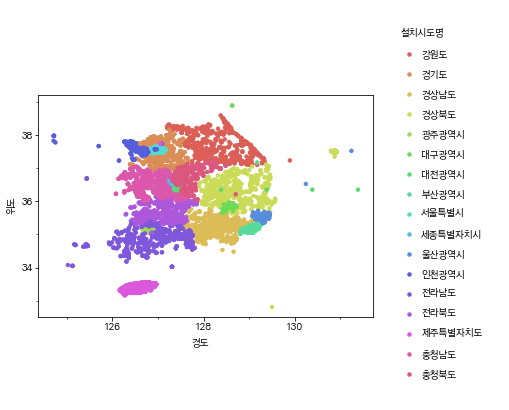

<ggplot: (88213174753)>

In [42]:
#시도별 wifi
(ggplot(wifi_rev) + aes(x='경도', y='위도', color='설치시도명') + geom_point()
+ theme(element_text(family='fontprop')))